**Prueba Sebastián Acevedo Espinoza**

In [31]:
#importando librerias de Python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso, LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder

**Parte 1**

**Exploración Inicial**

In [32]:
#cargando arvicho csv

df_sm=pd.read_csv("supermarket_sales - Sheet1.csv")
df_sm #visualizando tabla

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [33]:
#5 primeros datos de la tabla
df_sm.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [34]:
#5 últimos datos de la tabla
df_sm.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


In [35]:
#Tipos de datos
df_sm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [36]:
#Visualizando las variables estadísticas de la tabla
df_sm.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [37]:
#identificando datos faltantes de la tabla

df_sm.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [38]:
#Eliminando datos duplicados
df_sm.drop_duplicates()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


**Limpieza de Datos**

In [39]:
#filtrando la columna City 
df_sm1=df_sm[df_sm["City"]=="Yangon"]
df_sm1

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,886-18-2897,A,Yangon,Normal,Female,Food and beverages,56.56,5,14.1400,296.9400,3/22/2019,19:06,Credit card,282.80,4.761905,14.1400,4.5
992,745-74-0715,A,Yangon,Normal,Male,Electronic accessories,58.03,2,5.8030,121.8630,3/10/2019,20:46,Ewallet,116.06,4.761905,5.8030,8.8
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [40]:
#Guardando datos limpios, con la columna City = Yangon

df_sm1.to_csv("superlimpio.csv", index=False)

**Parte 2: Análisis Exploratio de Datos**

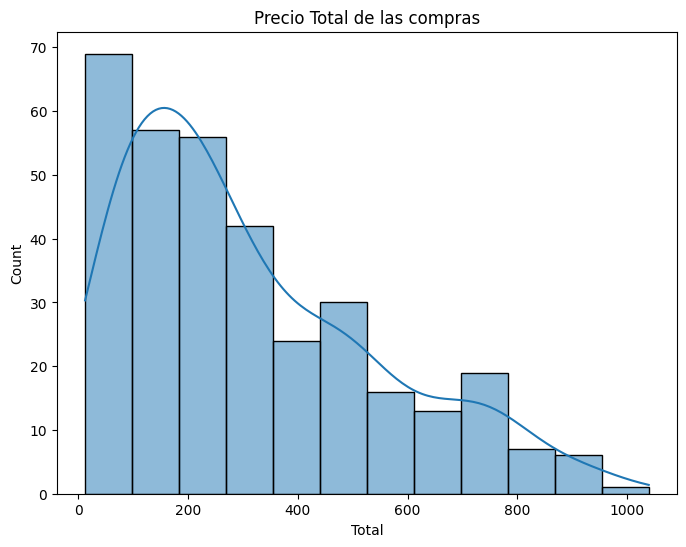

In [41]:
#Histograma de Precio total de ventas, donde la curva es la distribución suavizada de los datos 
plt.figure(figsize=(8, 6))
sns.histplot(df_sm1["Total"], kde=True)
plt.title('Precio Total de las compras')
plt.show()


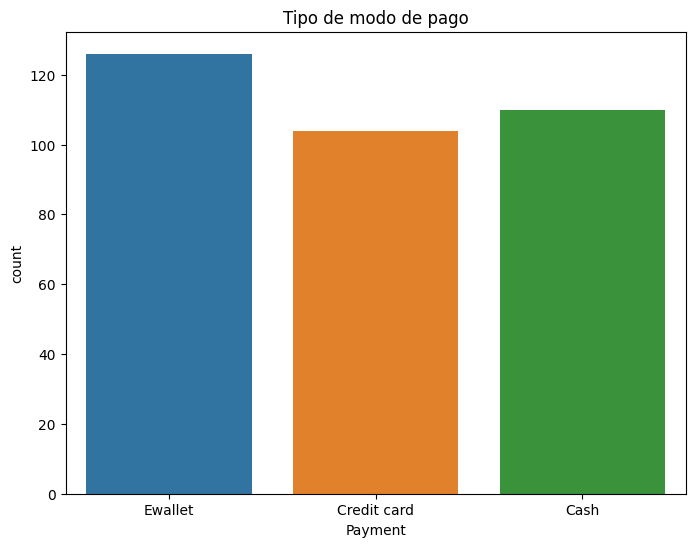

In [42]:
#Gráfico de barras de tipo de pago en el supermercado
plt.figure(figsize=(8, 6))
sns.countplot(x='Payment', data=df_sm1)
plt.title('Tipo de modo de pago')
plt.show()


In [43]:
df_sm1.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000
mean,54.780853,5.467647,14.874001,312.354031,297.480029,4.761905,14.874001,7.027059
std,26.132127,2.859876,11.030477,231.640025,220.609547,0.000000,11.030477,1.731345
min,10.080000,1.000000,0.604500,12.694500,12.090000,4.761905,0.604500,4.000000
25%,32.250000,3.000000,6.547125,137.489625,130.942500,4.761905,6.547125,5.600000
50%,53.235000,5.000000,11.468000,240.828000,229.360000,4.761905,11.468000,7.100000
75%,75.095000,8.000000,21.873375,459.340875,437.467500,4.761905,21.873375,8.500000
max,99.830000,10.000000,49.490000,1039.290000,989.800000,4.761905,49.490000,10.000000


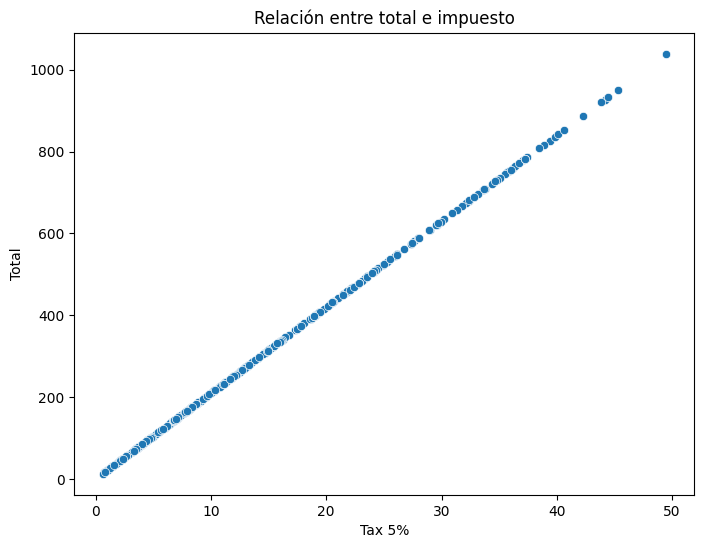

In [44]:
#gráfico de dispersión de relacion entre el total de las compras y el impuesto del 5%
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Tax 5%", y="Total", data=df_sm1)
plt.title('Relación entre total e impuesto')
plt.show()


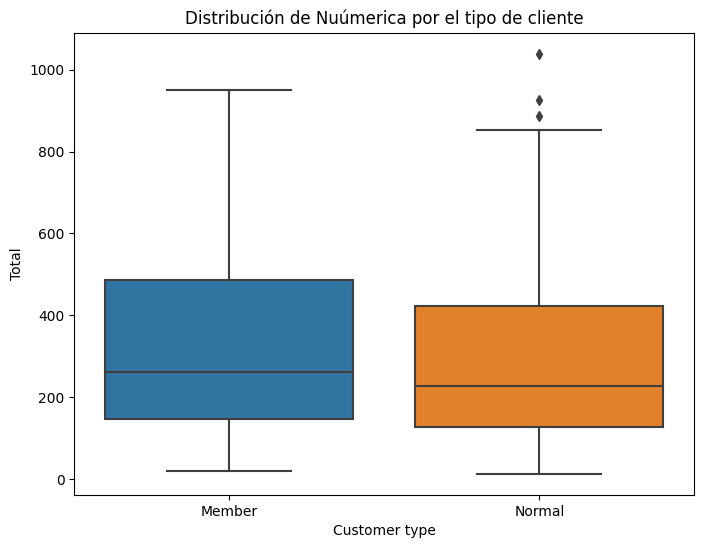

In [45]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="Customer type", y="Total", data=df_sm1)
plt.title('Distribución de Nuúmerica por el tipo de cliente')
plt.show()


C:\Users\sebas\AppData\Local\Temp\ipykernel_17804\1157716784.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_sm1.corr()


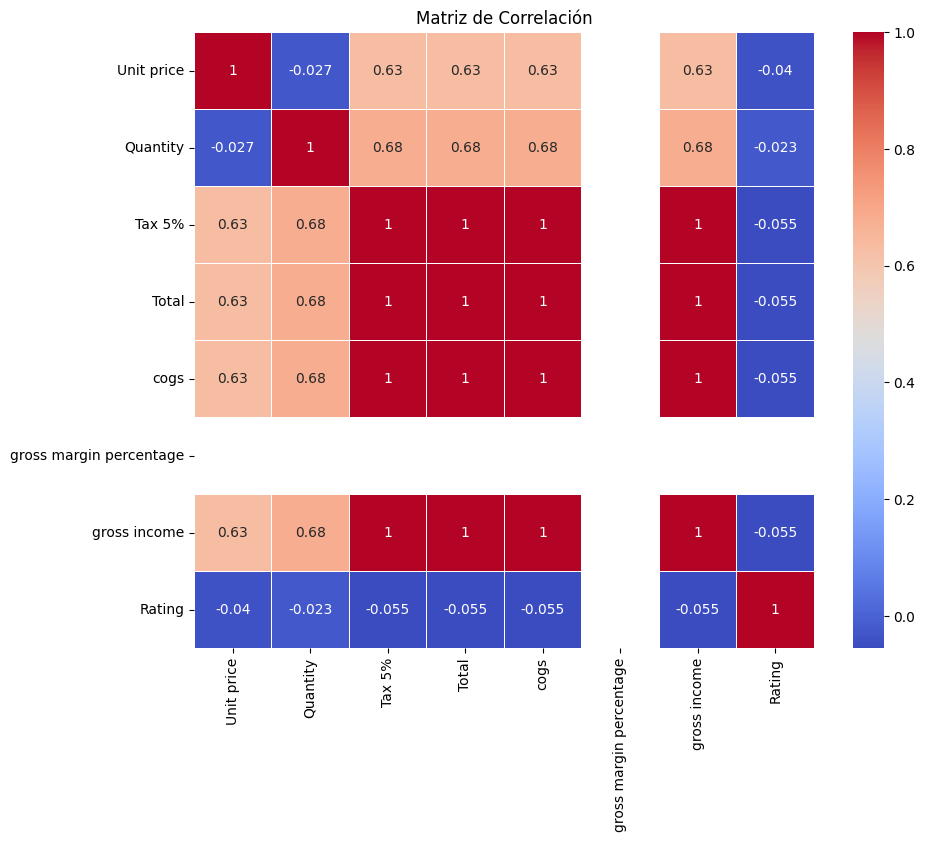

In [46]:
#Matriz de correlación entre variables númericas
plt.figure(figsize=(10, 8))
correlation_matrix = df_sm1.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()


_Acá creamos un modelo de regresión lineal, para obtener un aumento en la cantidad de ventas totales con un incentivo al cliente (haciemdo un descuento de 3%, cuando el cliente compra más de 7 articulos)_

In [47]:

#Paso 1: Crear una columna que indique si el cliente recibe el descuento (compra más de 7 artículos)
df_sm1['Descuento'] = df_sm1['Quantity'] > 7  # True si compra más de 7 artículos

# Paso 2: Asignar un 3% de descuento a los clientes que califican
df_sm1['TotalConDescuento'] = df_sm1.apply(lambda row: row['Total'] * 0.97 if row['Descuento'] else row['Total'], axis=1)

# Paso 3: Definir las variables de entrada (X) y salida (y)
# Usaremos la cantidad de artículos para predecir el total de ventas con y sin descuento
X = df_sm1[['Quantity']]  # Usamos la cantidad de artículos como variable de entrada (predictora)
y = df_sm1['TotalConDescuento']  # El total con el descuento será nuestra variable de salida

# Paso 4: Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 5: Definir y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Paso 6: Hacer predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Paso 7: Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar las métricas
print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Error absoluto medio (MAE): {mae:.2f}")
print(f"R^2 (R-cuadrado): {r2:.2f}")

# Mostrar las predicciones y las ventas reales
resultados = pd.DataFrame({'Ventas Reales': y_test, 'Predicciones': y_pred})
print(resultados.head())


Error cuadrático medio (MSE): 29774.43
Error absoluto medio (MAE): 135.27
R^2 (R-cuadrado): 0.35
     Ventas Reales  Predicciones
842       82.88700    119.274745
331      103.63500    174.674607
324      135.57600    340.874194
126      169.31250    285.474331
360      659.66208    451.673918


C:\Users\sebas\AppData\Local\Temp\ipykernel_17804\4102594085.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sm1['Descuento'] = df_sm1['Quantity'] > 7  # True si compra más de 7 artículos
C:\Users\sebas\AppData\Local\Temp\ipykernel_17804\4102594085.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sm1['TotalConDescuento'] = df_sm1.apply(lambda row: row['Total'] * 0.97 if row['Descuento'] else row['Total'], axis=1)


**El modelo que se usa es una regresión lineal, propuse que los cliente que compraban más de 7 articulos, obtenian un 3% de descuento, así generando más ventas en el supermecado, por ejemplo de 82.887 dolares, con este modelo se aumentó a 119.275 dolares de ganancia, por lo tanto, este modelo se puede implementar en un supermercardo**

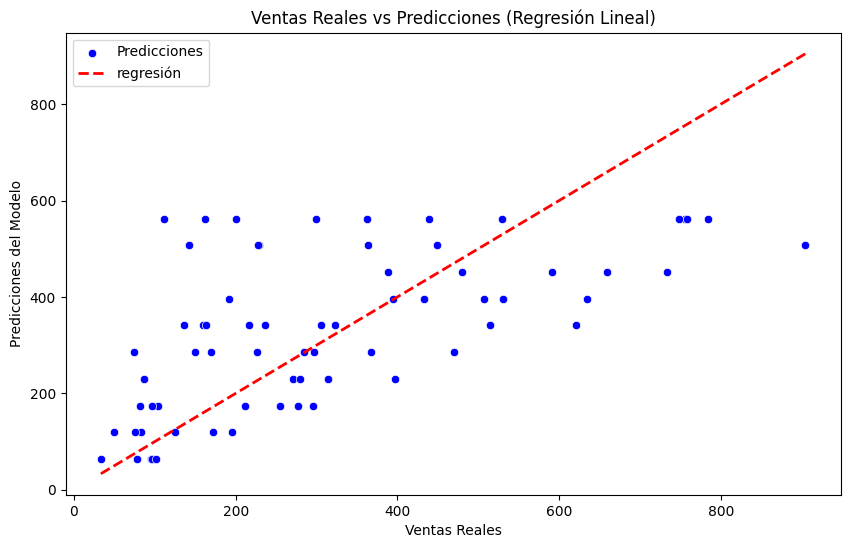

In [48]:
# Crear una gráfica de dispersión de las ventas reales vs las predicciones
plt.figure(figsize=(10, 6))

# Gráfica de dispersión de los datos reales vs las predicciones
sns.scatterplot(x=y_test, y=y_pred, color="blue", label="Predicciones")

# Añadir una línea de regresión (45 grados para mostrar el ajuste perfecto)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="regresión")

# Añadir etiquetas y título
plt.xlabel("Ventas Reales")
plt.ylabel("Predicciones del Modelo")
plt.title("Ventas Reales vs Predicciones (Regresión Lineal)")
plt.legend()

# Mostrar la gráfica
plt.show()

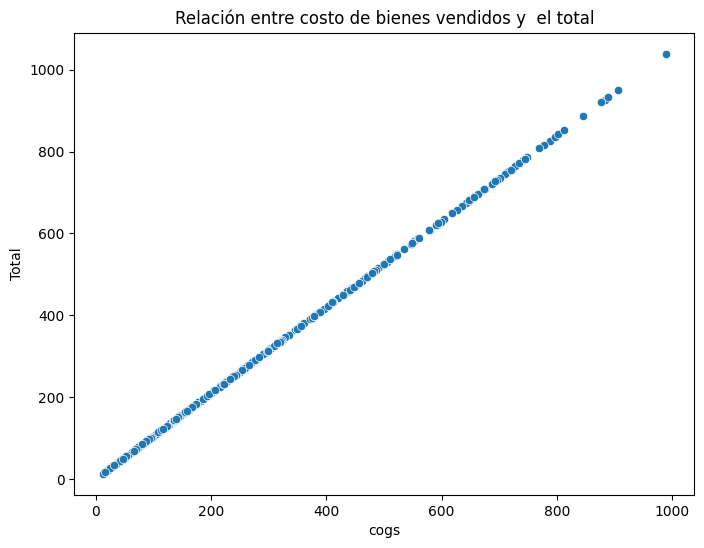

In [49]:
#relacion entre el total de las compras y el costo de bienes vendidos
plt.figure(figsize=(8, 6))
sns.scatterplot(x="cogs", y="Total", data=df_sm1)
plt.title('Relación entre costo de bienes vendidos y  el total')
plt.show()


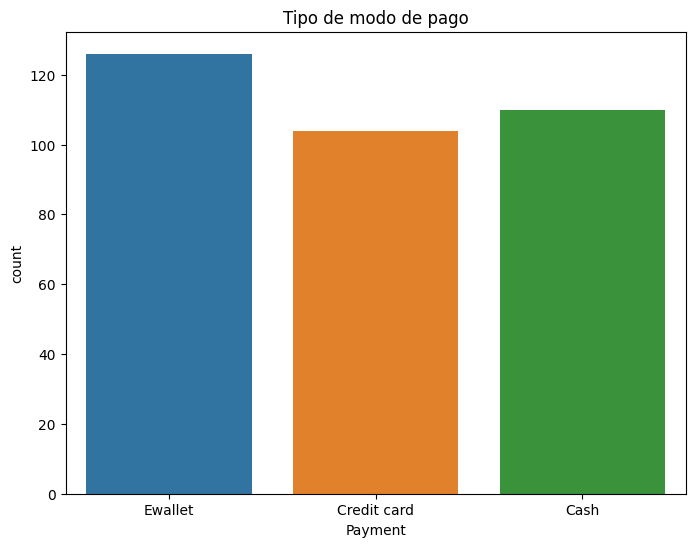

In [50]:
#Gráfico de barras de tipo de pago en el supermercado
plt.figure(figsize=(8, 6))
sns.countplot(x='Payment', data=df_sm1)
plt.title('Tipo de modo de pago')
plt.show()


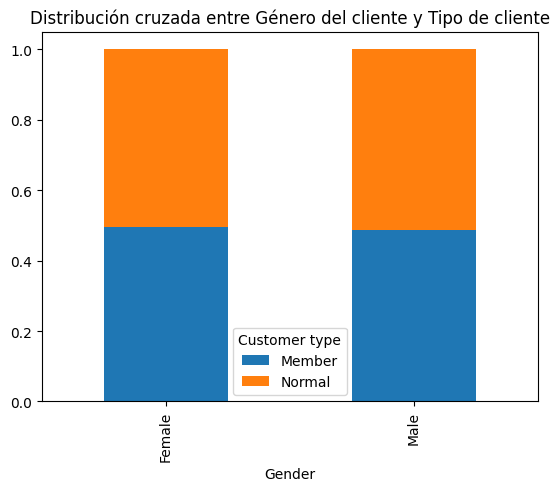

In [51]:
#Acá se muestra la diferencia de genero con el tipo de membresía de los clientes
pd.crosstab(df_sm1['Gender'], df_sm1['Customer type'], normalize='index').plot(kind='bar', stacked=True)
plt.title('Distribución cruzada entre Género del cliente y Tipo de cliente')
plt.show()


In [52]:
df_sm1.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'Descuento', 'TotalConDescuento'],
      dtype='object')

**Parte 3: Modelado Predictivo**  _comparamos los modelos de Regresión Lineal y Desición de Arbol donde hanemos la relación entre el precio total de ventas y el precio de cada producto del supermencado en la cuidad de Yagon_

Árbol de Decisión:
RMSE: 289.06
MAE: 208.76
R^2: -0.73

Regresión Lineal:
RMSE: 189.20
MAE: 146.42
R^2: 0.26


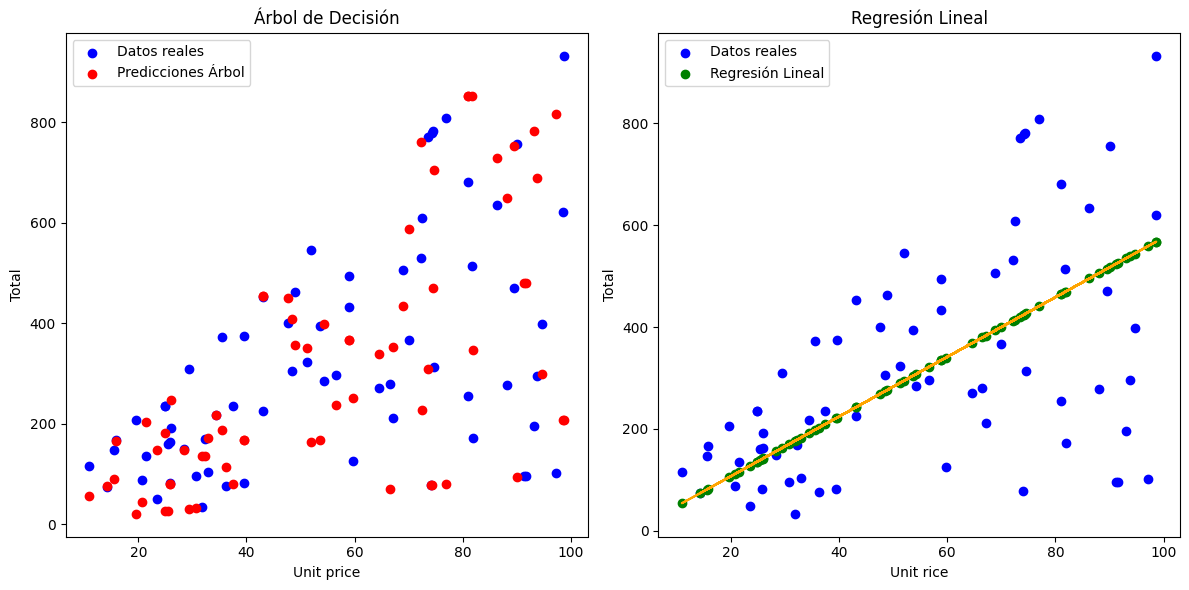

In [53]:
#modelos de desición de árbol y regresión lineal

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df_sm1[['Unit price']], df_sm1['Total'], test_size=0.2, random_state=42)

# 1. Entrenar el modelo de árbol de decisión
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# 2. Hacer predicciones con el árbol de decisión
y_pred_tree = tree_model.predict(X_test)

# 3. Evaluar el árbol de decisión
tree_rmse = np.sqrt(mean_squared_error(y_test, y_pred_tree))
tree_mae = mean_absolute_error(y_test, y_pred_tree)
tree_r2 = r2_score(y_test, y_pred_tree)

# 4. Entrenar el modelo de regresión lineal
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# 5. Hacer predicciones con la regresión lineal
y_pred_linear = linear_model.predict(X_test)

# 6. Evaluar la regresión lineal
linear_rmse = np.sqrt(mean_squared_error(y_test, y_pred_linear))
linear_mae = mean_absolute_error(y_test, y_pred_linear)
linear_r2 = r2_score(y_test, y_pred_linear)

# 7. Resultados de la evaluación
print("Árbol de Decisión:")
print(f"RMSE: {tree_rmse:.2f}")
print(f"MAE: {tree_mae:.2f}")
print(f"R^2: {tree_r2:.2f}")

print("\nRegresión Lineal:")
print(f"RMSE: {linear_rmse:.2f}")
print(f"MAE: {linear_mae:.2f}")
print(f"R^2: {linear_r2:.2f}")

# 8. Visualización de los resultados
plt.figure(figsize=(12, 6))

# Graficar el árbol de decisión
plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.scatter(X_test, y_pred_tree, color='red', label='Predicciones Árbol')
plt.title('Árbol de Decisión')
plt.xlabel('Unit price')
plt.ylabel('Total')
plt.legend()

# Graficar la regresión lineal
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.scatter(X_test, y_pred_linear, color='green', label='Regresión Lineal')
plt.plot(X_test, linear_model.predict(X_test), color='orange')  # Línea de la regresión
plt.title('Regresión Lineal')
plt.xlabel('Unit rice')
plt.ylabel('Total')
plt.legend()

plt.tight_layout()
plt.show()


**Utilizamos los modelos de REGRESIÓN LINEAL(RL) y DESISIÓN DE ÁRBOL(TREE), donde se tomó las variables Unit price(precio de cada producto) y Total(total de ventas), donde el mejor modelo es RL con sus metricas con RMSE, MAE de menor valor que el modelo TREE, ya que estas variables miden el error de los modelos, con un $R^{2}$(TREE) negativo y un $R^{2}$(RL) del 26%. En los gráficos de dispersión se puede observar que el modelo RL los datos se ajustan a la curva $R^{2}$.**

-Regresión Lineal (Ridge):

    Definimos un modelo de regresión Ridge.
    Especificamos un rango de valores para el parámetro de regularización αα.
    Realizamos la búsqueda de hiperparámetros de manera similar.-

In [54]:
# Definir el rango de hiperparámetros para Ridge y Lasso
param_grid = {
    'alpha': [0.1, 1.0, 10.0, 100.0]  # Diferentes valores de regularización
}

In [55]:
# Búsqueda de hiperparámetros para Ridge
ridge = Ridge()
ridge_grid = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
ridge_grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1.0, 10.0, 100.0]},
             scoring='neg_mean_squared_error')

In [56]:
# Mejor modelo Ridge
best_ridge = ridge_grid.best_estimator_
y_pred_ridge = best_ridge.predict(X_test)

_Evaluación: Se muestran las métricas de rendimiento (RMSE, MAE y R2R2) para ambos modelos, así como sus mejores hiperparámetros._

In [57]:
# Métricas de rendimiento para el modelo Ridge
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

In [58]:
# Resultados
print("Mejores hiperparámetros para Ridge:", ridge_grid.best_params_)
print(f"RMSE (Ridge): {rmse_ridge:.2f}, MAE (Ridge): {mae_ridge:.2f}, R² (Ridge): {r2_ridge:.2f}")


Mejores hiperparámetros para Ridge: {'alpha': 100.0}
RMSE (Ridge): 189.18, MAE (Ridge): 146.40, R² (Ridge): 0.26


In [59]:
# Búsqueda de hiperparámetros para Lasso
lasso = Lasso()
lasso_grid = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
lasso_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.1, 1.0, 10.0, 100.0]},
             scoring='neg_mean_squared_error')

In [60]:
# Mejor modelo Lasso
best_lasso = lasso_grid.best_estimator_
y_pred_lasso = best_lasso.predict(X_test)


In [61]:
# Métricas de rendimiento para el modelo Lasso
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

In [62]:
# Resultados
print("Mejores hiperparámetros para Lasso:", lasso_grid.best_params_)
print(f"RMSE (Lasso): {rmse_lasso:.2f}, MAE (Lasso): {mae_lasso:.2f}, R² (Lasso): {r2_lasso:.2f}")

Mejores hiperparámetros para Lasso: {'alpha': 10.0}
RMSE (Lasso): 189.13, MAE (Lasso): 146.34, R² (Lasso): 0.26


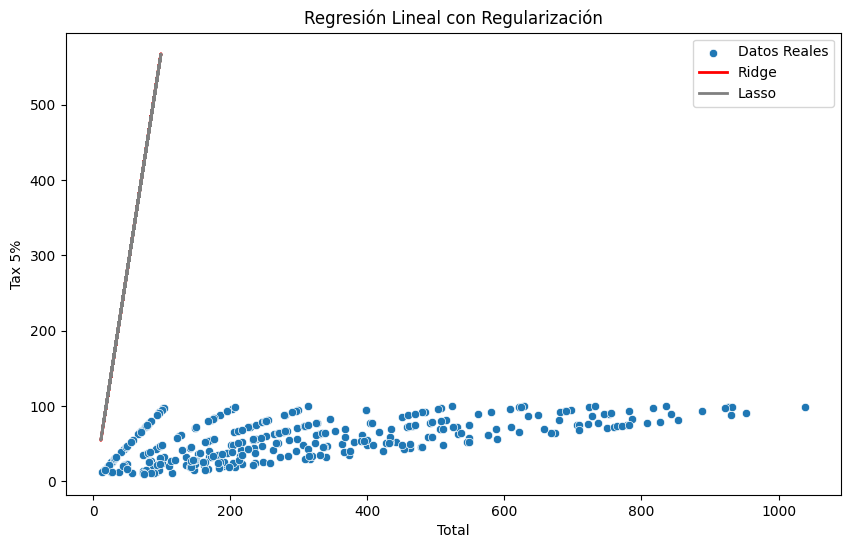

In [63]:
# Visualización de resultados 
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_sm1, x='Total', y='Unit price', label='Datos Reales')
plt.plot(X_test, y_pred_ridge, color='red', linewidth=2, label='Ridge')
plt.plot(X_test, y_pred_lasso, color='gray', linewidth=2, label='Lasso')
plt.title('Regresión Lineal con Regularización')
plt.xlabel('Total')
plt.ylabel('Tax 5%')
plt.legend()
plt.show()

_Para la regresión Lineal con regularización con hiperparámetros no cambia con respecto a la Regularización $RMSE$, $MAE$ y $R^{2}$ son iguales al modelo anterior_

**Parte 4: Visualización y Recomendaciones usando un dashboard con matplotlib**

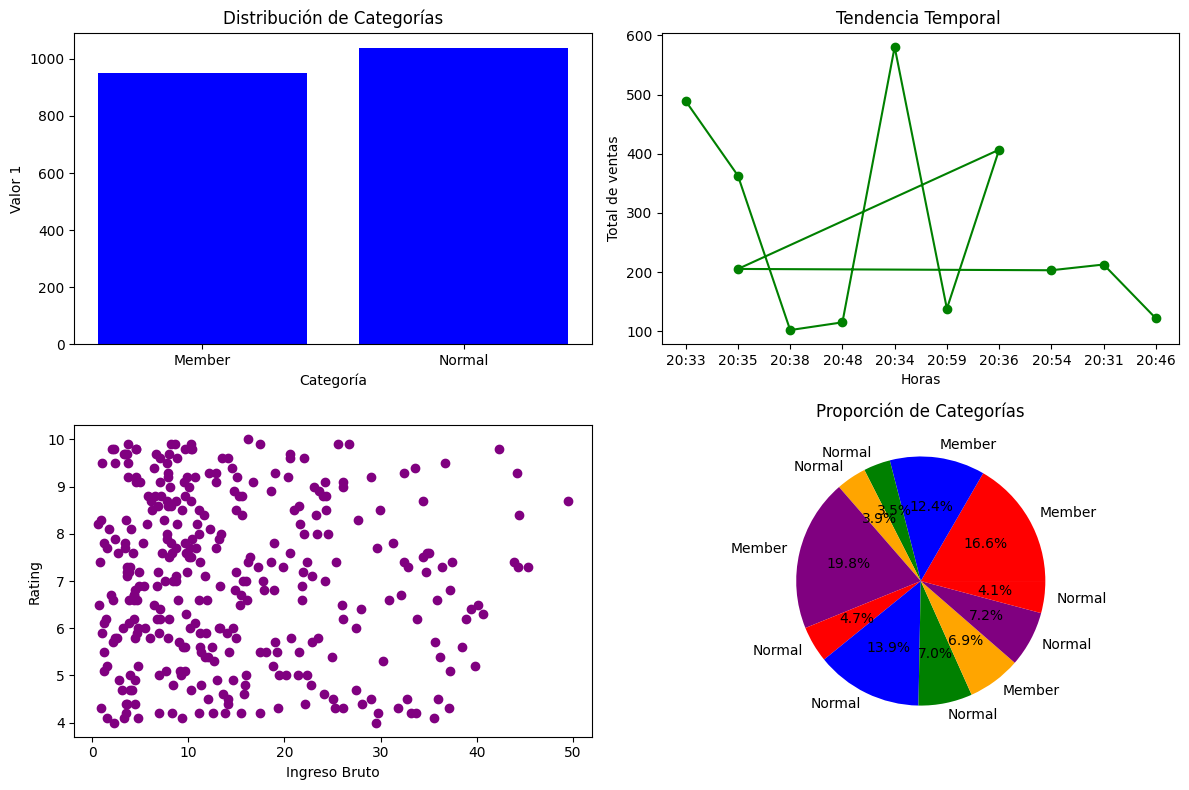

In [64]:


# Crear una figura con múltiples subplots (dashboard)
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# 1. Gráfico de barras - Distribución de categorías
axs[0, 0].bar(df_sm1["Customer type"], df_sm1["Total"], color='blue')
axs[0, 0].set_title('Distribución de Categorías')
axs[0, 0].set_xlabel('Categoría')
axs[0, 0].set_ylabel('Valor 1')

# 2. Gráfico de líneas - Tendencia temporal
axs[0, 1].plot(df_sm1[df_sm1["Time"]>="20:30"]["Time"], df_sm1[df_sm1["Time"]>="20:30"]["Total"], color='green', marker='o')
axs[0, 1].set_title('Tendencia Temporal ')
axs[0, 1].set_xlabel('Horas')
axs[0, 1].set_ylabel('Total de ventas')

# 3. Gráfico de dispersión - Relación entre Valor1 y Valor2
axs[1, 0].scatter(df_sm1["gross income"], df_sm1["Rating"], color='purple')
#axs[1, 0].set_title('Relación entre Valor 1 y Valor 2')
axs[1, 0].set_xlabel('Ingreso Bruto')
axs[1, 0].set_ylabel('Rating')

# 4. Gráfico de pastel - Proporción de las categorías
axs[1, 1].pie(df_sm1[df_sm1["Time"]>="20:30"]["Total"], labels=df_sm1[df_sm1["Time"]>="20:30"]["Customer type"], autopct='%1.1f%%', colors=['red', 'blue', 'green', 'orange', 'purple'])
axs[1, 1].set_title('Proporción de Categorías')

# Ajustar diseño para evitar solapamientos
plt.tight_layout()

# Mostrar el dashboard
plt.show()


**Acá usamos la tabla completa con las tres cuidades y sucursales, para mostar las tendencias de ventas por sucusal y categoría de producto** 

In [65]:
#Tendencias de ventas por sucursal y categoría de producto
# Agrupar por fecha, sucursal y categoría, y calcular las ventas totales
tendencias_ventas = df_sm.groupby(['Date', 'Branch', 'Product line']).agg({'Total': 'sum'}).reset_index()

# Mostrar las tendencias de ventas
print(tendencias_ventas.head())


       Date Branch            Product line    Total
0  1/1/2019      A  Electronic accessories  779.310
1  1/1/2019      A     Fashion accessories  621.243
2  1/1/2019      A      Home and lifestyle  399.756
3  1/1/2019      A       Sports and travel  571.011
4  1/1/2019      B  Electronic accessories  470.673


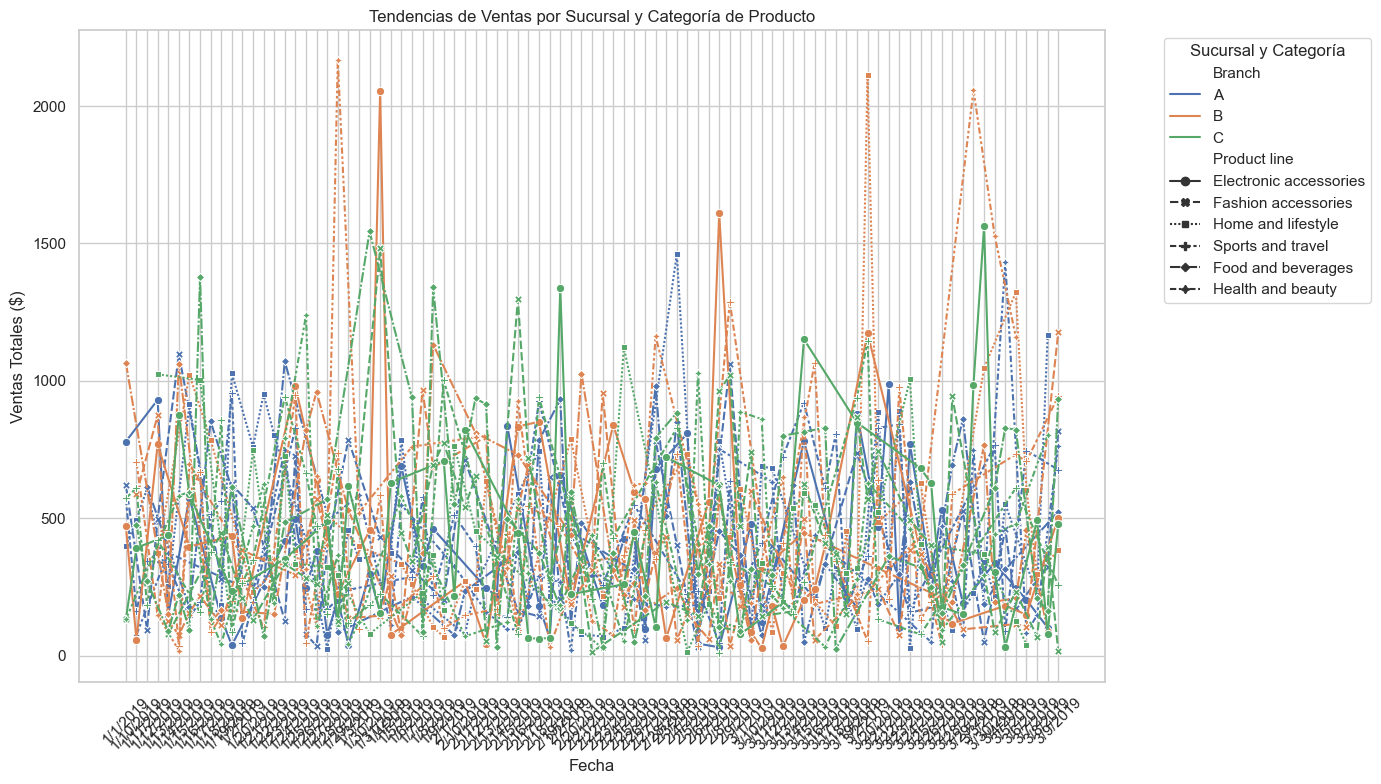

In [66]:
# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# 1. Gráfico de líneas para las tendencias de ventas por sucursal y categoría
plt.figure(figsize=(14, 8))
sns.lineplot(data=tendencias_ventas, x='Date', y='Total', hue='Branch', style='Product line', markers=True)

# Personalizar el gráfico
plt.title('Tendencias de Ventas por Sucursal y Categoría de Producto')
plt.ylabel('Ventas Totales ($)')
plt.xlabel('Fecha')
plt.legend(title='Sucursal y Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

** Comparación de patrones de compra entre diferente tipos de clientes, donde tomamos Gender(género), total de ventas y cantidad de productos** 

In [67]:
#comparación de patrones de compra entre diferentes tipos de clientes

# Calcular estadísticas descriptivas por método de pago
estadisticas = df_sm1.groupby("Gender").agg({
    "Total": ['mean', 'median', 'std', 'count'],
    'Quantity': ['mean', 'median', 'std']
}).reset_index()

# Renombrar columnas
estadisticas.columns = ['Gender', 'Media_Compra', 'Mediana_Compra', 'Desviacion_Estandar_Compra', 'Numero_Clientes', 'Media_Frecuencia', 'Mediana_Frecuencia', 'Desviacion_Estandar_Frecuencia']

# Mostrar estadísticas
print(estadisticas)



   Gender  Media_Compra  Mediana_Compra  Desviacion_Estandar_Compra  \
0  Female    330.864391         257.145                  233.068675   
1    Male    295.705047         233.100                  229.724007   

   Numero_Clientes  Media_Frecuencia  Mediana_Frecuencia  \
0              161          5.645963                 5.0   
1              179          5.307263                 5.0   

   Desviacion_Estandar_Frecuencia  
0                        2.793765  
1                        2.916536  


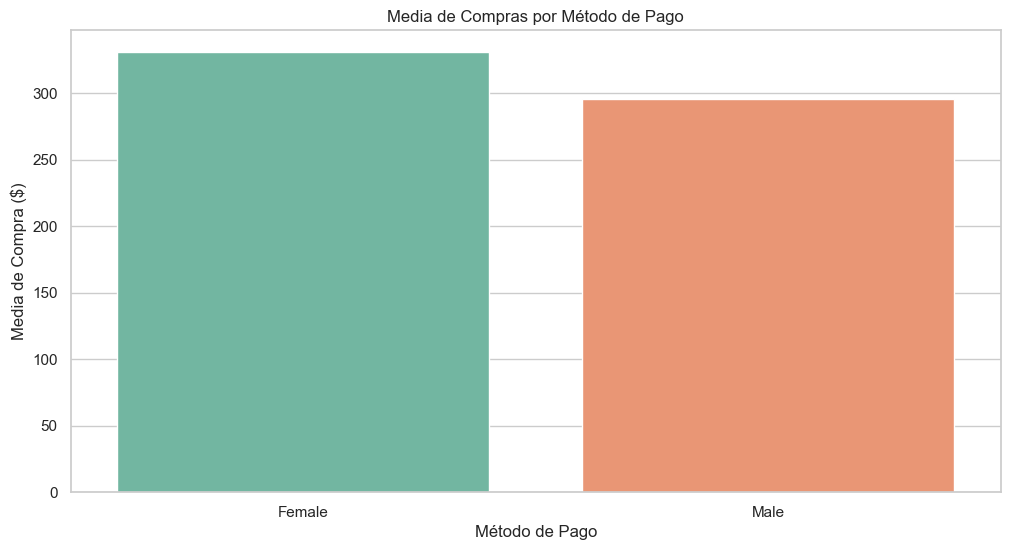

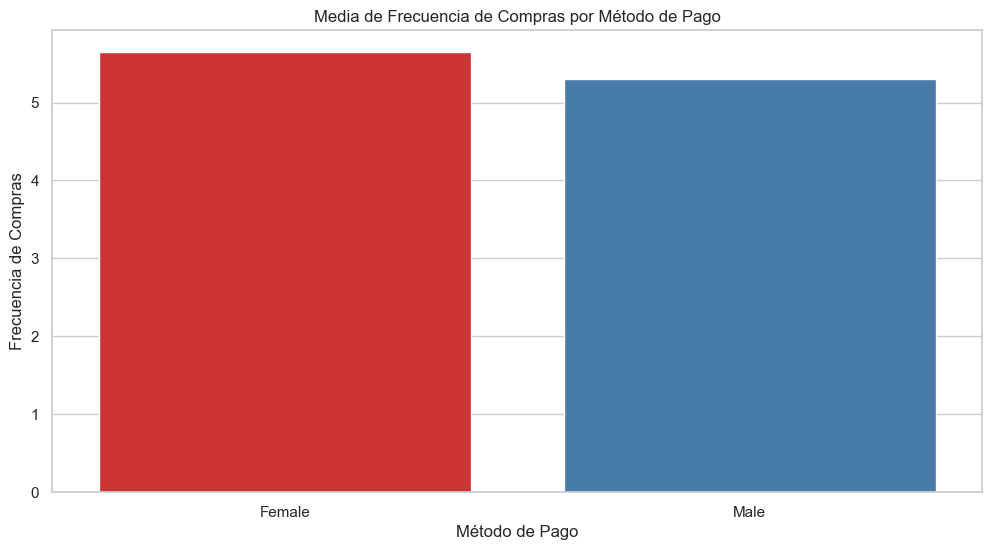

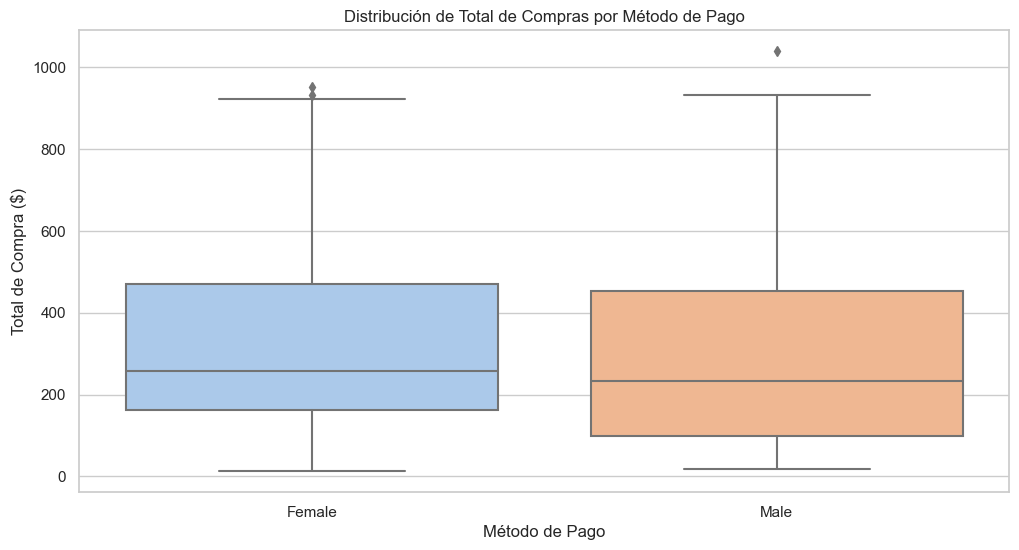

In [68]:
# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# 1. Gráfico de barras para el total de compras por método de pago
plt.figure(figsize=(12, 6))
sns.barplot(data=estadisticas, x='Gender', y='Media_Compra', palette='Set2')
plt.title('Media de Compras por Método de Pago')
plt.ylabel('Media de Compra ($)')
plt.xlabel('Método de Pago')
plt.show()

# 2. Gráfico de barras para la frecuencia de compras por método de pago
plt.figure(figsize=(12, 6))
sns.barplot(data=estadisticas, x='Gender', y='Media_Frecuencia', palette='Set1')
plt.title('Media de Frecuencia de Compras por Método de Pago')
plt.ylabel('Frecuencia de Compras')
plt.xlabel('Método de Pago')
plt.show()

# 3. Boxplot para la distribución de Total de Compras por Método de Pago
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_sm1, x='Gender', y='Total', palette='pastel')
plt.title('Distribución de Total de Compras por Método de Pago')
plt.ylabel('Total de Compra ($)')
plt.xlabel('Método de Pago')
plt.show()

**Rendimiento de modelo Predictivo: donde usamos una regresión lineal entre las variables Total y Unit price**

  Métrica      Valor
0    RMSE  20.084223
1     MAE  16.539068
2      R²   0.458931


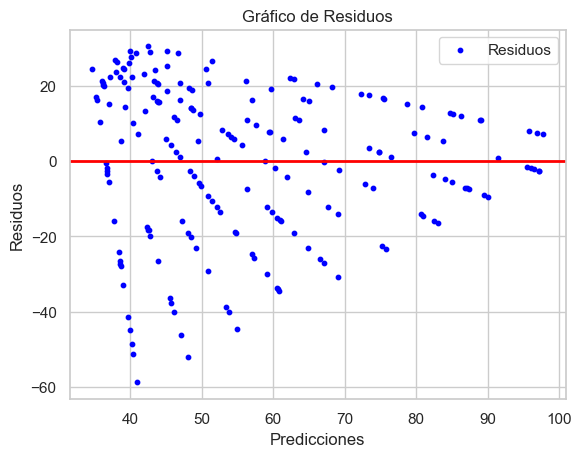

In [69]:
#rendimiento de modelo predictivo

 #Dividir los datos
x_train, x_test, y_train, y_test = train_test_split(df_sm[['Total']], df_sm['Unit price'], test_size=0.2, random_state=42)

# Crear y ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(x_train, y_train)

# Predecir
y_pred = model.predict(x_test)

# Calcular métricas
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Crear tabla con los resultados
resultados_regresion = pd.DataFrame({
    'Métrica': ['RMSE', 'MAE', 'R²'],
    'Valor': [rmse, mae, r2]
})

# Mostrar la tabla
print(resultados_regresion)

# Gráfico de residuos
plt.scatter(y_pred, y_pred - y_test, color='blue', s=10, label='Residuos')
plt.axhline(0, color='red', linewidth=2)
plt.title('Gráfico de Residuos')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.legend()
plt.show()


**Recomendaciones: 1: El supermercardo podría tener una oferta para clientes que compran más de 7 árticulos y así aumentar sus ventas.
                   2: El supermercado debería hacer un tipo de incentivo para usar la membresía para dar puntos de descuento.
                   3: El supermercado incentivar el pago de los producto con una tarjerta de crédito propia y no pagar comisiones a instituciones bancarias**